Sentiment analysis aims to determine a writer’s attitude towards a topic or the overall contextual polarity of a document. The attitude can be his judgment or assessment, his emotional state or the intended emotional communication.opinion words, which can generally be divided into two types: positive words, for example, wonderful. , elegant, astonishing; and negative words, eg horrible, disgusting, poor.

in given dataset "0" indicates negative and "1" indicates positive review

##import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##import dataset

In [2]:
df = pd.read_csv("/content/drive/MyDrive/sentiment_analysis.csv")
df

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1


##visualizing distribution of data in number

0    20019
1    19981
Name: label, dtype: int64


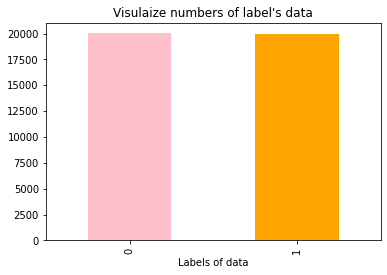

In [3]:
print(df['label'].value_counts())
df['label'].value_counts().plot(kind = "bar", color = ["pink", "orange"])
plt.xlabel("Labels of data")
plt.title("Visulaize numbers of label's data")
plt.show()

##visualizing distribution of data in percentage

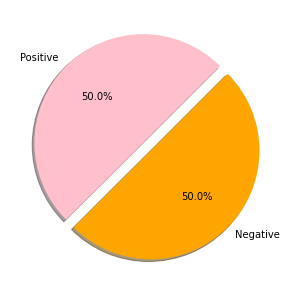

In [4]:
fig = plt.figure(figsize = (5,5))
colors = ["pink", "orange"]
positive = df[df['label'] == 1 ]
negative = df[df['label'] == 0 ]
count = [positive['label'].count(), negative['label'].count() ]
pie = plt.pie(count, labels = ['Positive', 'Negative'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0, 0.1))

##using re operation, remove tags and clean the text

In [5]:
import re
def clean_text(text):
  text = re.sub('<[^>]*>', '', text)
  emoji = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) +\
           " ".join(emoji).replace('-', ' ')
  return text

df['text'] = df['text'].apply(clean_text)
df['text']

0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union is something of a forgotten cla...
39996    this movie is an incredible piece of work it e...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object

##by using stemming or lemmatizing we remove unnecessary complexity

In [6]:
import nltk
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
stemmer = PorterStemmer()
wordnet = WordNetLemmatizer()

def tokenize(text):
  return text.split()

def lemmatize(text):
  return [stemmer.stem(word) for word in text.split()]
df['text']

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        i grew up b 1965 watching and loving the thund...
1        when i put this movie in my dvd player and sat...
2        why do people who do not know what a particula...
3        even though i have great interest in biblical ...
4        im a die hard dads army fan and nothing will e...
                               ...                        
39995     western union is something of a forgotten cla...
39996    this movie is an incredible piece of work it e...
39997    my wife and i watched this movie because we pl...
39998    when i first watched flatliners i was amazed i...
39999    why would this film be so good but only gross ...
Name: text, Length: 40000, dtype: object

##visualizing positive and negative words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Positive Words:


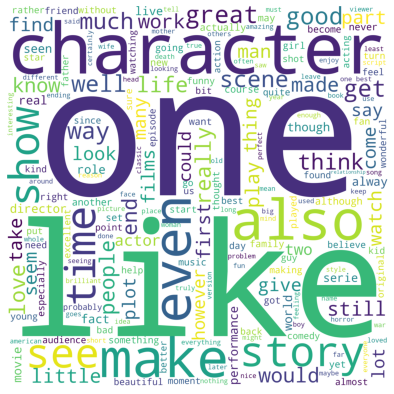

Negative words:


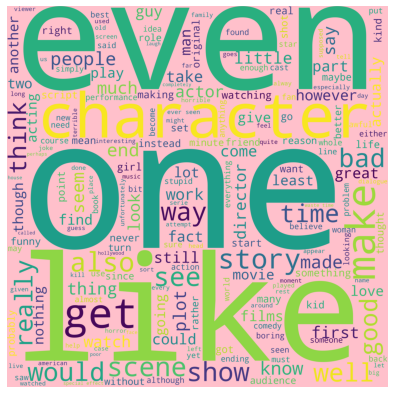

In [7]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

positivedata = df[df['label'] == 1]
positivedata = positivedata['text']

negativedata = df[df['label'] == 0]
negativedata = negativedata['text']

def wordcloud_draw(df, color = 'white'):
  words = ' '.join(df)
  cleaned_word = ' '.join([word for word in words.split()
                           if (word != 'movie' and word != 'film')])
  wordcloud = WordCloud(stopwords = stop,
                        background_color = color,
                        width = 2500, height = 2500).generate(cleaned_word)

  plt.figure(1, figsize = (10,7))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

print("Positive Words:")
wordcloud_draw(positivedata, 'white')

print("Negative words:")
wordcloud_draw(negativedata, 'pink')

##create tf-idf model to convert data into feature matrix

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,tokenizer=None,use_idf=True,norm='l2',smooth_idf=True)
y = df.label.values
x = tfidf.fit_transform(df.text)

In [15]:
print(x)

  (0, 44965)	0.11180687441081164
  (0, 28226)	0.11229826388136113
  (0, 40355)	0.06908699038419193
  (0, 80743)	0.1741170769567825
  (0, 72517)	0.3082236664400341
  (0, 39706)	0.1284108837769587
  (0, 51817)	0.15657344966277975
  (0, 69443)	0.12178468783539381
  (0, 12767)	0.021313589818689728
  (0, 1948)	0.10010556368963487
  (0, 52474)	0.05181608688694257
  (0, 69137)	0.08094158096249374
  (0, 14733)	0.08816929389460752
  (0, 71537)	0.08927103400419387
  (0, 89052)	0.09045445663325931
  (0, 30920)	0.025368701970550238
  (0, 91153)	0.06356222004596039
  (0, 39886)	0.10638776376168595
  (0, 17689)	0.05930194505126479
  (0, 89758)	0.06225683278003071
  (0, 14787)	0.09912833803343432
  (0, 23597)	0.07750950205397518
  (0, 41629)	0.018012469745801146
  (0, 37414)	0.0667161201276299
  (0, 75543)	0.04519124180458684
  :	:
  (39999, 78067)	0.09427565585038447
  (39999, 35388)	0.04103558791562324
  (39999, 29143)	0.10829182312394423
  (39999, 37045)	0.0464594733328343
  (39999, 84007)	0.06875

##divide dataset into training and test set

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = 0)

##create Logestic RegressionCv model

In [19]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

##predict the model

In [20]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0])

##check the accuracy of the model

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
score = accuracy_score(y_test, y_pred)
print(cm)
print("accuracy of our model is:",score)

[[5270  656]
 [ 635 5439]]
accuracy of our model is: 0.8924166666666666
